'**Date**': This column represents the date associated with the stock price data. Each row corresponds to a specific date.

'**Open**': The 'Open' column contains the opening price of the Google stock on each respective date. It indicates the price at which the stock started trading for the day.

'**High**': The 'High' column represents the highest price reached by the Google stock during the trading day.

'**Low**': The 'Low' column indicates the lowest price reached by the Google stock during the trading day.

'**Close**': The 'Close' column represents the closing price of the Google stock on each respective date. It indicates the price at which the stock finished trading for the day.

'**Volume**': The 'Volume' column denotes the trading volume, i.e., the number of shares of Google stock traded on each respective date.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
training_set=pd.read_csv('Google_Stock_Price_Train.csv')
training_set

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set = training_set.iloc[:,1:2].values

"""
training_set.iloc[:, 1:2]: 
  This uses the iloc indexer in pandas to select all rows (:) and the second column (1:2) of the DataFrame.
.values:
   This converts the selected subset of the DataFrame into a NumPy array.
By selecting only the values from the second column and converting them into a NumPy array, 
it is likely that the code is preparing the 'Open' column (column index 1) of the 'training_set' DataFrame for further processing or analysis.
"""


In [ ]:
from sklearn.preprocessing import MinMaxScaler  # This scaler is commonly used for feature scaling, specifically to scale data within a specific range (usually between 0 and 1).
sc = MinMaxScaler() 

In [ ]:
training_set = sc.fit_transform(training_set)

In [ ]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [ ]:
X_train = np.reshape(X_train, (1257, 1, 1))

# The purpose of reshaping is to prepare the data for input into a recurrent neural network (RNN) model that expects input data in a specific shape.

"""
The np.reshape() function is used to change the shape of the array X_train. 
The first argument is the array to be reshaped, and the second argument specifies the new shape. 

In this case, (1257, 1, 1) indicates that the reshaped X_train will have a shape of (1257, 1, 1),
 meaning it will have 1257 samples, each with 1 time step, and 1 feature.

Reshaping the data in this way is common when working with RNN models because they require input data in the form of (samples, time steps, features).
 By reshaping X_train in this manner, it is compatible with RNN models that expect input data in this format.
"""


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
regressor = Sequential()


"""
In the given code, regressor is an instance of the Sequential class from the Keras API. 
The Sequential class allows you to build a neural network model by stacking layers sequentially.


Once the Sequential object is created, you can add layers to it using the add() method.
 Each layer represents a different transformation or computation that is applied to the input data as it passes through the network


For example, you can add layers such as Dense, LSTM, Conv2D, etc., depending on the type of neural network you want to build. 
Each layer can have different configurations, such as the number of units/neurons, activation function, etc.,
which can be specified when adding the layer to the Sequential model.


After adding all the desired layers, you can compile the model using the compile() method, specifying the loss function, optimizer, and any desired metrics.
 Once the model is compiled, it can be trained on the training data using the fit() method
"""

regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

"""
In the given code, a Long Short-Term Memory (LSTM) layer is added to the regressor model using the add() method. Here's what the parameters mean:

units=4: This specifies the number of LSTM units/neurons in the layer. The LSTM units are responsible for capturing and learning patterns in the sequential data.
 In this case, there are 4 LSTM units in the layer.

activation='sigmoid': This specifies the activation function to be used in the LSTM layer. 
The sigmoid activation function is commonly used in LSTM layers as it allows the model to output values between 0 and 1, which can be interpreted as probabilities or continuous values.

input_shape=(None, 1): This specifies the shape of the input data expected by the LSTM layer. 
"""

regressor.add(Dense(units = 1))




In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 2s 2ms/step - loss: 0.1363
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0993
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0821
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0728
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0692
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0658
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0621
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0603
Epoch 13/200
40/40 [=================

In [ ]:
test_set = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = test_set.iloc[:,1:2].values

In [ ]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 322ms/step


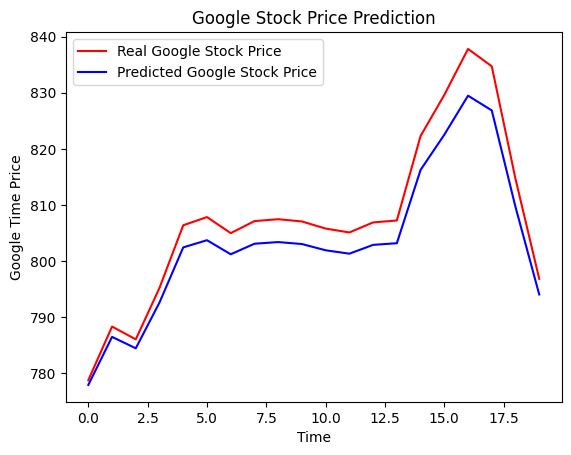

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

In [ ]:
real_stock_price = pd.read_csv("Google_Stock_Price_Train.csv")
real_stock_price = real_stock_price.iloc[:,1:2].values


In [ ]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

40/40 [==============================] - 0s 930us/step


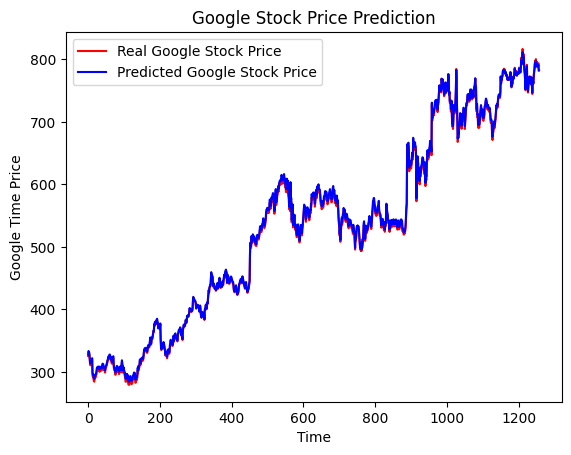

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()